In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('continuous_flights_data.csv')

# arima

In [5]:
def outl(data,column):
    dt= data[column].dropna()
    Q1 = dt.quantile(0.25) 
    Q3 = dt.quantile(0.75)  
    IQR = Q3 - Q1
    dt[dt< Q1 - (1.5* IQR)] = Q1 - (1.5* IQR)
    dt[dt> Q3 + (1.5* IQR)] = Q3 + (1.5* IQR)
    return dt

def split(data):
    l=len(data)*4//5
    f=len(data)-l
    y_train=y[:l]
    y_test=y[l:]
    pq=min(5,l//10)
    return y_train,y_test,l,f,pq


In [18]:
dfe={}
dfwe={}
for fid in data['FLIGHT_ID'].unique():
    y1=outl(data[data['FLIGHT_ID']==fid], 'ARRIVAL_DELAY')
    if len(y1)>=13:
        y2=(y1-y1.min()+0.1)
        y,lam=boxcox(y2)
        y_train,y_test,l,f,pq=split(y)
        model = pm.auto_arima(y_train, start_p=1, start_q=1,max_p=pq,max_q=pq, m=1, \
                            information_criterion='aic', test='adf', d=None, seasonal=False, \
                            error_action='ignore', suppress_warnings=True, stepwise=True)
        fc, confint = model.predict(n_periods=f, return_conf_int=True)
        yp=inv_boxcox(fc,lam)
        y_pred=yp-0.1+y1.min()
        rmse=((y_pred-y_test)**2).mean()
        rmsew=((y_pred-y_test)**2).sum()
    else:
        rmse=np.nan
        rmsew=np.nan
    dfe[fid]=rmse
    dfwe[fid]=rmsew
    print(fid,rmse,rmsew)

AA102 287.6136292965331 20708.18130935038
AA1028 480.20239576359995 8643.6431237448
AA1036 nan nan
AA1037 25.71297217599206 1851.3339966714284
AA1038 32.769838521161915 229.3888696481334
AA1042 308.79588669638656 22542.09972883622
AA1056 51.35584206524847 3286.773892175902
AA1123 391.46216179133546 12135.327015531399
AA1128 36.061618342100466 829.4172218683108
AA1130 66.61189620521337 2797.6996406189614
AA1165 154.62094885548342 10514.224522172872
AA1173 200.60456489798736 14644.133237553076
AA1182 133.02338352450445 2261.3975199165757
AA120 625.3092373362856 37518.55424017714
AA123 35.30034032250813 2541.624503220585
AA1257 nan nan
AA1352 131.7217153452619 9483.963504858857
AA1376 nan nan
AA1397 258.3753783990484 3617.255297586677
AA1406 6.3903374042161065 453.71395569934356
AA1420 16357.787418878215 81788.93709439108
AA1428 nan nan
AA1443 88.08563848106968 2642.5691544320903
AA1454 357.41519038992755 19657.835471446015
AA1482 573.4627171719873 41289.315636383086
AA1486 56.11715704935

In [57]:
'''dfe={}
dfwe={}
for fid in data['FLIGHT_ID'].unique():
    y=data[data['FLIGHT_ID']==fid]['ARRIVAL_DELAY'].dropna()
    l=len(y)*4//5
    f=len(y)-l
    y_train=y[:l]
    y_test=y[l:]
    mp=min(5,l//10)
    if mp>=1:
        model = pm.auto_arima(y_train, start_p=1, start_q=1,max_p=5, max_q=5, m=1, \
                            information_criterion='aic', test='adf', d=None, seasonal=False, \
                            error_action='ignore', suppress_warnings=True, stepwise=True)
        try:
            fc, confint = model.predict(n_periods=f, return_conf_int=True)
            rmse=((fc-y_test.values)**2).mean()
            rmsew=rmse*f
        except:
            model = pm.auto_arima(y_train, start_p=1, start_q=1,max_p=5, max_q=5, m=1, \
                                  information_criterion='aic', test='adf', d=1, seasonal=False, \
                                  error_action='ignore', suppress_warnings=True, stepwise=True)
            fc, confint = model.predict(n_periods=f, return_conf_int=True)
            rmse=((fc-y_test.values)**2).mean()
            rmsew=rmse*f
    else:
        rmse=np.nan
        rmsew=np.nan
    dfe[fid]=rmse
    dfwe[fid]=rmsew
    print(fid,rmse,rmsew)'''
    

AA102 386.24769732013397 27809.834207049644
AA1028 91.55555555555556 1648.0
AA1036 nan nan
AA1037 1460.3697381187765 105146.6211445519
AA1038 8008.624060035107 56060.368420245744
AA1042 624.1780821917808 45565.0
AA1056 1063.208525688938 68045.34564409203
AA1123 2110.8477310186163 65436.27966157711
AA1128 342.10217748088473 7868.3500820603485
AA1130 3714.506271258503 156009.26339285713
AA1165 535.4942206756564 36413.607005944636
AA1173 320.240794878895 23377.57802615933
AA1182 386.21382988481645 6565.63510804188
AA120 711.1 42666.0
AA123 2151.277546937519 154891.98337950138
AA1257 nan nan
AA1352 2887.6134741512346 207908.1701388889
AA1376 nan nan
AA1397 235.54394373459783 3297.6152122843696
AA1406 709.8589925602296 50399.9884717763
AA1420 811.4124910830391 4057.0624554151955
AA1428 nan nan
AA1443 722.4150627214401 21672.451881643203
AA1454 261.1636363636364 14364.000000000002
AA1482 332.87116441905334 23966.72383817184
AA1486 1243.163064482188 89507.74064271754
AA1508 882.2831004146034 

In [19]:
df1 = pd.DataFrame(list(dfe.items()), columns=['FLIGHT_ID', 'MEAN'])
df2 = pd.DataFrame(list(dfwe.items()), columns=['FLIGHT_ID', 'SUM'])

df= pd.merge(df1, df2, on='FLIGHT_ID')

In [18]:
'''model = pm.auto_arima(y_train, start_p=1, start_q=1,\
                      information_criterion='aic', test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False,\   
                      start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)'''

In [20]:
for fid in df[df['MEAN'].notna()]['FLIGHT_ID']:
    y=data[data['FLIGHT_ID']==fid]['ARRIVAL_DELAY'].dropna()
    l=len(y)*4//5
    f=len(y)-l
    df.loc[df['FLIGHT_ID']==fid,'WEIGHT']=f

In [21]:
df['RMSE']=np.sqrt(df['SUM'].sum()/df['WEIGHT'].sum())

In [22]:
df

,FLIGHT_ID,MEAN,SUM,WEIGHT,RMSE
0,AA102,287.613629,20708.181309,72.0,185.893174
1,AA1028,480.202396,8643.643124,18.0,185.893174
2,AA1036,NaN,NaN,NaN,185.893174
3,AA1037,25.712972,1851.333997,72.0,185.893174
4,AA1038,32.769839,229.388870,7.0,185.893174
...,...,...,...,...,...
1928,WN6828,NaN,NaN,NaN,185.893174
1929,WN6850,NaN,NaN,NaN,185.893174
1930,WN6881,NaN,NaN,NaN,185.893174
1931,WN6887,NaN,NaN,NaN,185.893174


In [23]:
df.to_csv('RMSEofARIMA.csv')

# plot

In [6]:
df=pd.read_csv('RMSEofARIMA.csv')

In [7]:
df1=df.sort_values(by='MEAN').reset_index()

In [12]:
df2=df1[df1['WEIGHT']==73]

In [13]:
df2

,index,Unnamed: 0,FLIGHT_ID,MEAN,SUM,WEIGHT,RMSE
2,1215,1215,HA334,2.670010,194.910728,73.0,185.893174
3,1157,1157,HA215,3.447309,251.653576,73.0,185.893174
4,171,171,AS223,3.454453,252.175075,73.0,185.893174
7,1216,1216,HA335,4.108946,299.953048,73.0,185.893174
14,721,721,B6700,4.937340,360.425808,73.0,185.893174
...,...,...,...,...,...,...,...
1319,154,154,AS143,1366.976245,99789.265852,73.0,185.893174
1327,344,344,AS834,1445.171652,105497.530602,73.0,185.893174
1328,346,346,AS840,1464.092782,106878.773057,73.0,185.893174
1335,351,351,AS862,1555.060763,113519.435678,73.0,185.893174


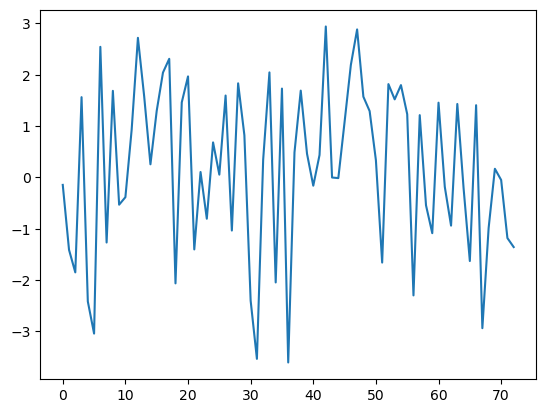

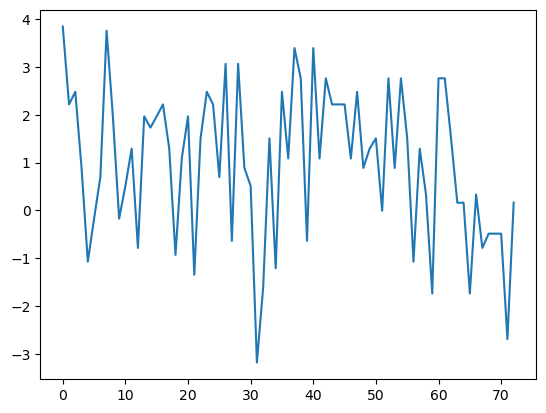

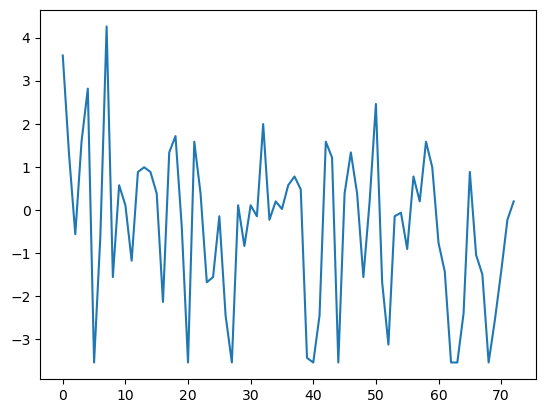

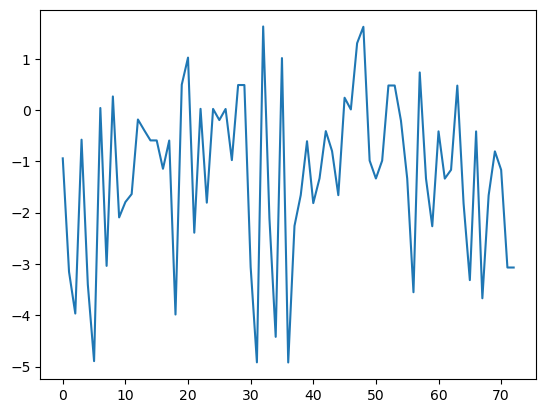

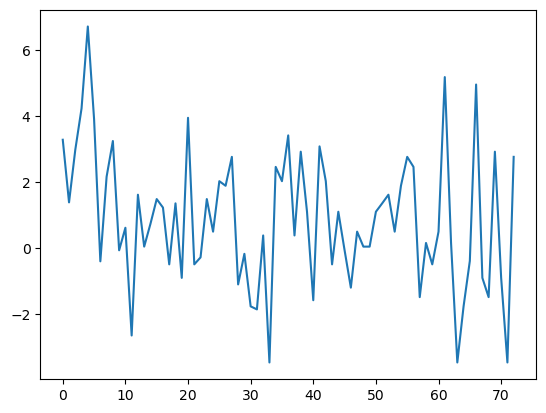

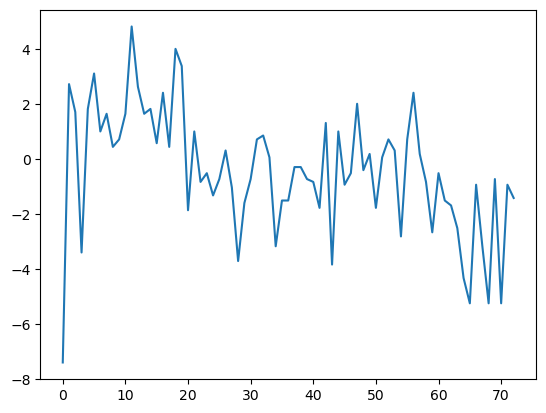

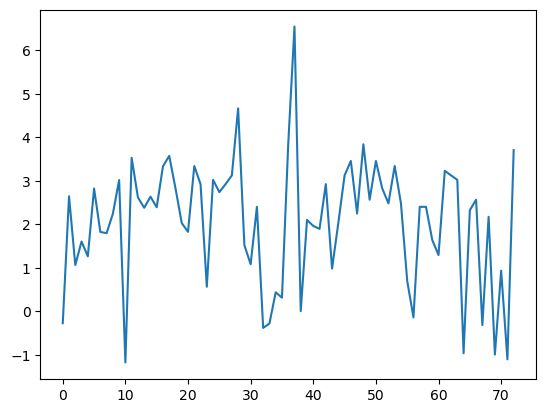

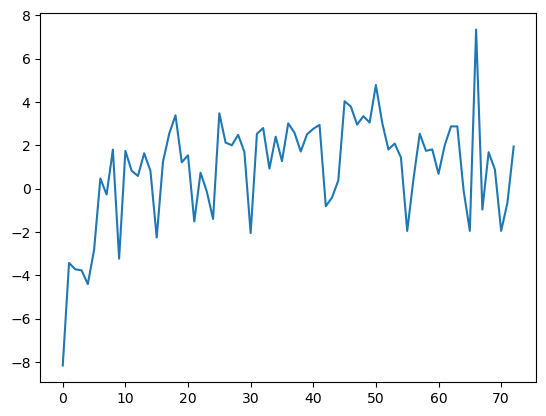

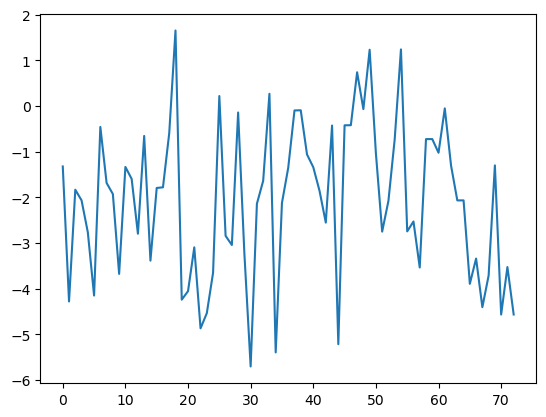

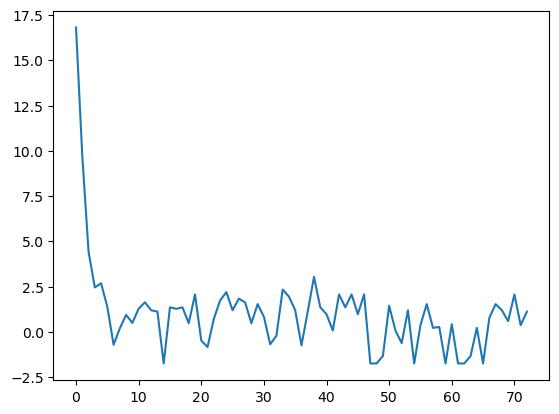

In [14]:
for fid in df2['FLIGHT_ID'].unique()[:10]:
    y1=outl(data[data['FLIGHT_ID']==fid], 'ARRIVAL_DELAY')
    if len(y1)>=13:
        y2=(y1-y1.min()+0.1)
        y,lam=boxcox(y2)
        y_train,y_test,l,f,pq=split(y)
        model = pm.auto_arima(y_train, start_p=1, start_q=1,max_p=pq,max_q=pq, m=1, \
                            information_criterion='aic', test='adf', d=None, seasonal=False, \
                            error_action='ignore', suppress_warnings=True, stepwise=True)
        fc, confint = model.predict(n_periods=f, return_conf_int=True)
        yp=inv_boxcox(fc,lam)
        y_pred=yp-0.1+y1.min()
        plt.plot(y_pred-y_test)
        plt.show()